<style>
/* Centered title “card” with background (light & dark mode) */
.title-card {
  text-align: center;
  padding: 28px 24px;
  border-radius: 16px;
  border: 1px solid rgba(128,128,128,0.25);
  box-shadow: 0 10px 24px rgba(0,0,0,0.12);
  color: #0f172a;
  background: linear-gradient(135deg, #f8fafc, #eef2ff);
  font-family: ui-sans-serif, -apple-system, Segoe UI, Roboto, Helvetica, Arial, "Apple Color Emoji", "Segoe UI Emoji";
}
.title-card h1 {
  margin: 0 0 8px 0;
  font-size: 2rem;
  line-height: 1.2;
}
.title-card p { margin: 6px 0; font-size: 1rem; }
.title-card .muted { color: #475569; }

/* Feature table */
.feature-table {
  width: 100%;
  border-collapse: collapse;
  margin-top: 12px;
}
.feature-table th, .feature-table td {
  border: 1px solid rgba(128,128,128,0.25);
  padding: 8px 10px;
  text-align: left;
  vertical-align: top;
  font-size: 0.95rem;
  background: rgba(255,255,255,0.55);
}
.feature-table th {
  font-weight: 700;
  background: rgba(99,102,241,0.10);
}

/* Dark mode */
@media (prefers-color-scheme: dark) {
  .title-card {
    color: #e5e7eb;
    background: linear-gradient(135deg, #0b1220, #111827);
    border-color: rgba(255,255,255,0.08);
    box-shadow: 0 12px 30px rgba(0,0,0,0.45);
  }
  .feature-table th, .feature-table td {
    border-color: rgba(255,255,255,0.12);
    background: rgba(17,24,39,0.6);
  }
  .feature-table th {
    background: rgba(99,102,241,0.18);
  }
  .title-card .muted { color: #9aa3b2; }
}
</style>

<div class="title-card">
  <h1>Heart Attack Risk — Classification Project</h1>
  <p><em>Predicting “Low” vs “High” risk from medical features — Dataset: <code>heart.csv</code></em></p>
  <p class="muted">Target: <code>target</code> — <strong>0</strong>: Low risk, <strong>1</strong>: High risk</p>

  <hr style="width:60%;border:0;border-top:1px solid rgba(128,128,128,0.25);margin:14px auto;">

  <p><strong>Prepared by:</strong> Alireza Javid</p>
  <p class="muted">M.Sc. Student, Structural Engineering — Sharif University of Technology</p>
  <p class="muted">Date: November 6, 2022</p>

  <table class="feature-table">
    <thead>
      <tr>
        <th>Column</th>
        <th>Description / Values</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><code>Age</code></td>
        <td>Age (years)</td>
      </tr>
      <tr>
        <td><code>Sex</code></td>
        <td>Biological sex</td>
      </tr>
      <tr>
        <td><code>exang</code></td>
        <td>Exercise-induced angina — <strong>1</strong>: Yes, <strong>0</strong>: No</td>
      </tr>
      <tr>
        <td><code>ca</code></td>
        <td>Number of major vessels (0–3)</td>
      </tr>
      <tr>
        <td><code>cp</code></td>
        <td>
          Chest pain type — <strong>1</strong>: Typical angina, <strong>2</strong>: Atypical angina,
          <strong>3</strong>: Non-anginal pain, <strong>4</strong>: Asymptomatic
        </td>
      </tr>
      <tr>
        <td><code>trtbps</code></td>
        <td>Resting blood pressure (mm Hg)</td>
      </tr>
      <tr>
        <td><code>chol</code></td>
        <td>Serum cholesterol (mg/dL)</td>
      </tr>
      <tr>
        <td><code>fbs</code></td>
        <td>Fasting blood sugar (high) — <strong>1</strong>: Yes, <strong>0</strong>: No</td>
      </tr>
      <tr>
        <td><code>rest_ecg</code></td>
        <td>Resting ECG — <strong>0</strong>: Normal, <strong>1</strong>: ST-T abnormality, <strong>2</strong>: Probable/definite LVH</td>
      </tr>
      <tr>
        <td><code>thalach</code></td>
        <td>Maximum heart rate achieved</td>
      </tr>
      <tr>
        <td><code>target</code></td>
        <td>Heart attack risk — <strong>0</strong>: Low, <strong>1</strong>: High</td>
      </tr>
    </tbody>
  </table>
</div>


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Load Data From CSV File


In [4]:
cell_df = pd.read_csv("heart.csv")
cell_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data pre-processing and selection


Let's first look at columns data types:

In [7]:
cell_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
feature_df = cell_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng','caa']]
X = np.asarray(feature_df)
X[0:5]

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   0],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   0],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   0],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0]], dtype=int64)

We want the model to predict the value of output (that is, low chance (=0) or high chance (=1)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [10]:
y = np.asarray(cell_df['output'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Train/Test dataset

We split our dataset into train and test set:

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


In [16]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

After being fitted, the model can then be used to predict new values:


In [18]:
yhat = clf.predict(X_test)
print(yhat [0:30])
print(y_test[0:30])

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0]


<h2 id="evaluation">Evaluation</h2>


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix, without normalization
[[21  4]
 [ 2 34]]


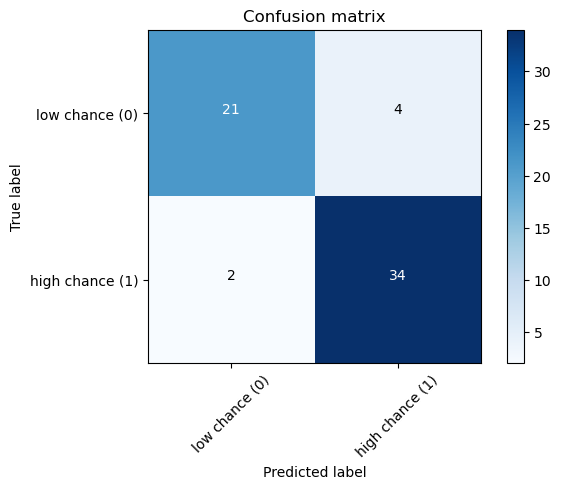

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low chance (0)','high chance (1)'],normalize= False,  title='Confusion matrix')

In [23]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9009193619849357

In [24]:
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, yhat,pos_label=0))
print(jaccard_score(y_test, yhat,pos_label=1))

0.7777777777777778
0.85
